In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
palette = sb.color_palette("viridis", 4)
palette2 = sb.color_palette("viridis", n_colors = 6)
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 8}                  
sb.set_context("paper", rc = paper_rc)    

# City by City Analysis


## Riyadh - Download

In [56]:
df1 = pd.read_csv(r'riyadh\riyadh_download_may22_2019.csv', parse_dates=['date'], index_col='date')
df2 = pd.read_csv(r'riyadh\riyadh_download_may22_2020.csv', parse_dates=['date'], index_col='date')
df3 = pd.read_csv(r'riyadh\riyadh_download_may22_2021.csv', parse_dates=['date'], index_col='date')
dfs = [df1, df2, df3]
df = pd.concat(dfs)
dfRiyadh = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Riyadh"})
dfRiyadh['month'] = pd.to_datetime(dfRiyadh.index).month
dfRiyadh['year'] = pd.to_datetime(dfRiyadh.index).year
dfRiyadh

,Throughput_Riyadh,month,year
date,,,
2019-05-31,8.550000,5,2019
2019-06-30,9.200595,6,2019
2019-07-31,6.935082,7,2019
2019-08-31,10.852727,8,2019
2019-09-30,11.308995,9,2019
2019-10-31,11.330495,10,2019
2019-11-30,13.663377,11,2019
2019-12-31,17.734871,12,2019
2020-01-31,16.836022,1,2020


## Riyadh Upload

In [57]:
df1 = pd.read_csv(r'riyadh\riyadh_upload_may22_2019.csv', parse_dates=['date'], index_col='date')
df2 = pd.read_csv(r'riyadh\riyadh_upload_may22_2020.csv', parse_dates=['date'], index_col='date')
df3 = pd.read_csv(r'riyadh\riyadh_upload_may22_2021.csv', parse_dates=['date'], index_col='date')
dfs = [df1, df2, df3]
df = pd.concat(dfs)
dfRiyadh_upload = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Riyadh"})
dfRiyadh_upload['month'] = pd.to_datetime(dfRiyadh_upload.index).month
dfRiyadh_upload['year'] = pd.to_datetime(dfRiyadh_upload.index).year
dfRiyadh_upload

,Throughput_Riyadh,month,year
date,,,
2019-05-31,6.954969,5,2019
2019-06-30,7.200043,6,2019
2019-07-31,5.117362,7,2019
2019-08-31,7.846263,8,2019
2019-09-30,8.433791,9,2019
2019-10-31,8.730714,10,2019
2019-11-30,10.240765,11,2019
2019-12-31,10.916488,12,2019
2020-01-31,11.015988,1,2020


## Riyadh Plots

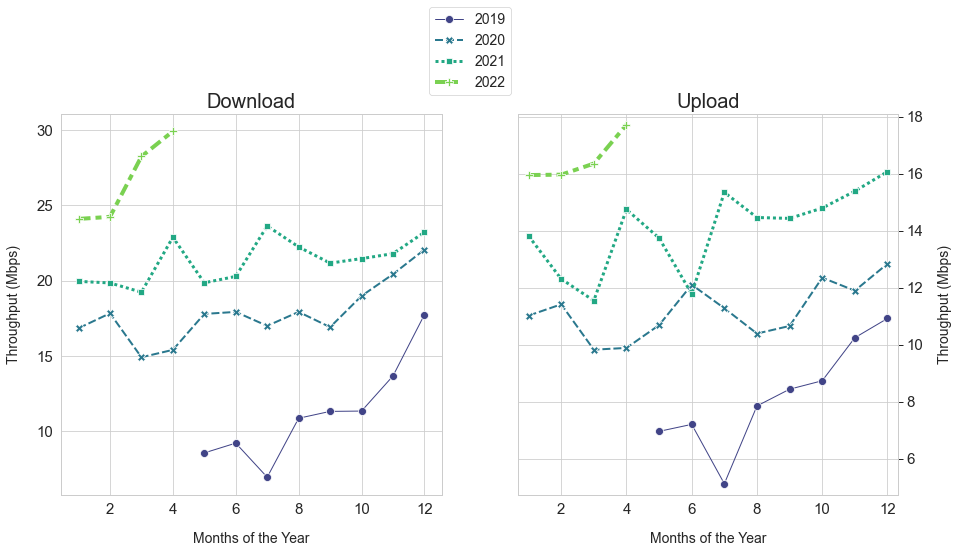

In [58]:
fig, ax = plt.subplots(1,2)

sb.lineplot(x='month',y='Throughput_Riyadh',data=dfRiyadh, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[0]) # for download

sb.lineplot(x='month',y='Throughput_Riyadh',data=dfRiyadh_upload, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[1]) # for upload

ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_title('Download', fontdict={'fontsize': 20})

ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_title('Upload', fontdict={'fontsize': 20})
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

plt.margins(0.03)
ax[0].legend(labels=['2019','2020', '2021', '2022'], prop={'size': 14}, bbox_to_anchor=(1.2, 1.3))
plt.savefig('figures/riyadhthru.pdf', bbox_inches='tight')

## Dubai - Download

In [59]:
#Dubai - Import Data
df1 = pd.read_csv(r'dubai\dubai_download_may22_2019.csv', parse_dates=['date'], index_col='date')
df2 = pd.read_csv(r'dubai\dubai_download_may22_2020.csv', parse_dates=['date'], index_col='date')
df3 = pd.read_csv(r'dubai\dubai_download_may22_2021.csv', parse_dates=['date'], index_col='date')
dfs = [df1, df2, df3]
df = pd.concat(dfs)
dfDubai = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Dubai"})
dfDubai['month'] = pd.to_datetime(dfDubai.index).month
dfDubai['year'] = pd.to_datetime(dfDubai.index).year
dfDubai

,Throughput_Dubai,month,year
date,,,
2019-05-31,12.021286,5,2019
2019-06-30,14.334405,6,2019
2019-07-31,13.185197,7,2019
2019-08-31,10.594795,8,2019
2019-09-30,10.108736,9,2019
2019-10-31,13.166572,10,2019
2019-11-30,37.243043,11,2019
2019-12-31,43.031984,12,2019
2020-01-31,50.535517,1,2020


## Dubai - Upload

In [61]:
df1 = pd.read_csv(r'dubai\dubai_upload_may22_2019.csv', parse_dates=['date'], index_col='date')
df2 = pd.read_csv(r'dubai\dubai_upload_may22_2020.csv', parse_dates=['date'], index_col='date')
df3 = pd.read_csv(r'dubai\dubai_upload_may22_2021.csv', parse_dates=['date'], index_col='date')
dfs = [df1, df2, df3]
df = pd.concat(dfs)
dfDubai_upload = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Dubai"})
dfDubai_upload['month'] = pd.to_datetime(dfDubai_upload.index).month
dfDubai_upload['year'] = pd.to_datetime(dfDubai_upload.index).year
dfDubai_upload

,Throughput_Dubai,month,year
date,,,
2019-05-31,7.105324,5,2019
2019-06-30,8.679231,6,2019
2019-07-31,9.359389,7,2019
2019-08-31,8.502303,8,2019
2019-09-30,8.756039,9,2019
2019-10-31,10.030021,10,2019
2019-11-30,11.931191,11,2019
2019-12-31,13.163269,12,2019
2020-01-31,14.096542,1,2020


## Dubai Plot

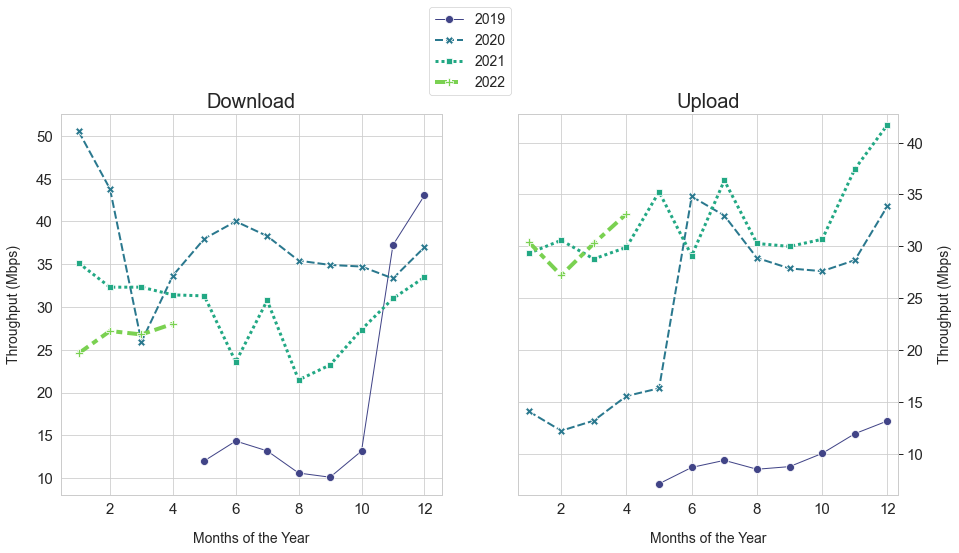

In [62]:
#Dubai plot

fig, ax = plt.subplots(1,2)

sb.lineplot(x='month',y='Throughput_Dubai',data=dfDubai, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[0]) # for download

sb.lineplot(x='month',y='Throughput_Dubai',data=dfDubai_upload, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[1]) # for upload

ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_title('Download', fontdict={'fontsize': 20})

ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_title('Upload', fontdict={'fontsize': 20})
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

plt.margins(0.03)
ax[0].legend(labels=['2019','2020', '2021', '2022'], prop={'size': 14}, bbox_to_anchor=(1.2, 1.3))
plt.savefig('figures/dubaithru.pdf', bbox_inches='tight')

## Kuwait - Download

In [63]:
#Kuwait - Import Data
df = pd.read_csv(r'kuwait_city\kuwaitcity_download_may22.csv', parse_dates=['date'], index_col='date')
dfKuwait = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Kuwait"})
dfKuwait['month'] = pd.to_datetime(dfKuwait.index).month
dfKuwait['year'] = pd.to_datetime(dfKuwait.index).year
dfKuwait

,Throughput_Kuwait,month,year
date,,,
2019-05-31,7.977520,5,2019
2019-06-30,7.725719,6,2019
2019-07-31,9.007722,7,2019
2019-08-31,10.007406,8,2019
2019-09-30,8.468122,9,2019
2019-10-31,8.134635,10,2019
2019-11-30,13.125383,11,2019
2019-12-31,15.190446,12,2019
2020-01-31,13.580507,1,2020


## Kuwait - Upload

In [64]:
df = pd.read_csv(r'kuwait_city\kuwaitcity_upload_may22.csv', parse_dates=['date'], index_col='date')
dfKuwait_upload = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Kuwait"})
dfKuwait_upload['month'] = pd.to_datetime(dfKuwait_upload.index).month
dfKuwait_upload['year'] = pd.to_datetime(dfKuwait_upload.index).year
dfKuwait_upload

,Throughput_Kuwait,month,year
date,,,
2019-05-31,9.284054,5,2019
2019-06-30,9.022844,6,2019
2019-07-31,8.024528,7,2019
2019-08-31,12.672600,8,2019
2019-09-30,11.785689,9,2019
2019-10-31,10.492060,10,2019
2019-11-30,13.909336,11,2019
2019-12-31,15.411261,12,2019
2020-01-31,14.542837,1,2020


## Kuwait Plot

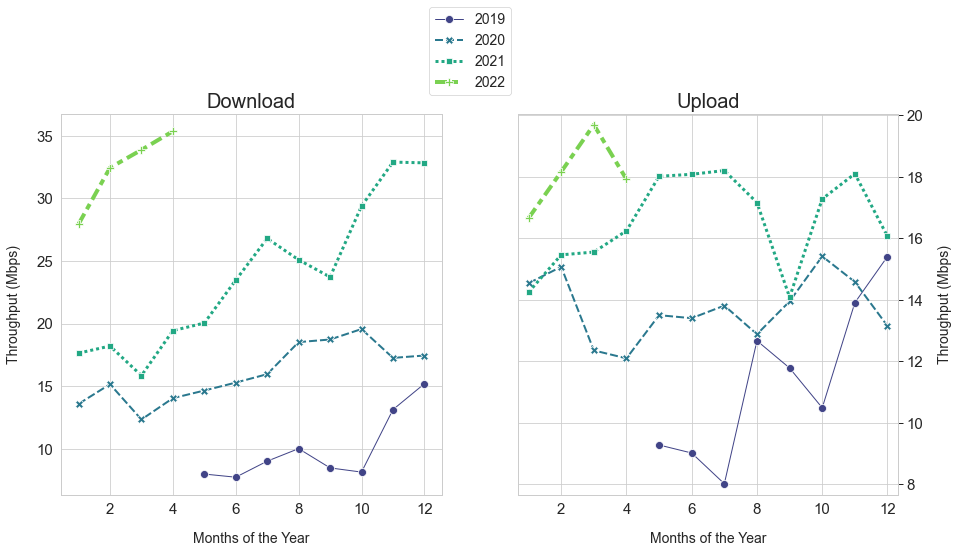

In [65]:
#Kuwait City plot
fig, ax = plt.subplots(1,2)

sb.lineplot(x='month',y='Throughput_Kuwait',data=dfKuwait, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[0]) # for download

sb.lineplot(x='month',y='Throughput_Kuwait',data=dfKuwait_upload, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[1]) # for upload

ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_title('Download', fontdict={'fontsize': 20})

ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_title('Upload', fontdict={'fontsize': 20})
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

plt.margins(0.03)
ax[0].legend(labels=['2019','2020', '2021', '2022'], prop={'size': 14}, bbox_to_anchor=(1.2, 1.3))
plt.savefig('figures/kuwaitthru.pdf', bbox_inches='tight')

## Doha - Download

In [66]:
#Doha - Import Data
df = pd.read_csv(r'doha\doha_download_may22.csv', parse_dates=['date'], index_col='date')
dfDoha = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Doha"})
dfDoha['month'] = pd.to_datetime(dfDoha.index).month
dfDoha['year'] = pd.to_datetime(dfDoha.index).year
dfDoha

,Throughput_Doha,month,year
date,,,
2019-05-31,14.848683,5,2019
2019-06-30,16.190687,6,2019
2019-07-31,14.185931,7,2019
2019-08-31,14.872646,8,2019
2019-09-30,11.886063,9,2019
2019-10-31,14.784052,10,2019
2019-11-30,31.558462,11,2019
2019-12-31,27.976386,12,2019
2020-01-31,27.092141,1,2020


## Doha - Upload

In [67]:
df = pd.read_csv(r'doha\doha_upload_may22.csv', parse_dates=['date'], index_col='date')
dfDoha_upload = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Doha"})
dfDoha_upload['month'] = pd.to_datetime(dfDoha_upload.index).month
dfDoha_upload['year'] = pd.to_datetime(dfDoha_upload.index).year
dfDoha_upload

,Throughput_Doha,month,year
date,,,
2019-05-31,14.257121,5,2019
2019-06-30,17.005862,6,2019
2019-07-31,16.625192,7,2019
2019-08-31,17.978229,8,2019
2019-09-30,17.221592,9,2019
2019-10-31,17.160883,10,2019
2019-11-30,27.944629,11,2019
2019-12-31,27.025784,12,2019
2020-01-31,25.949907,1,2020


## Doha Plot

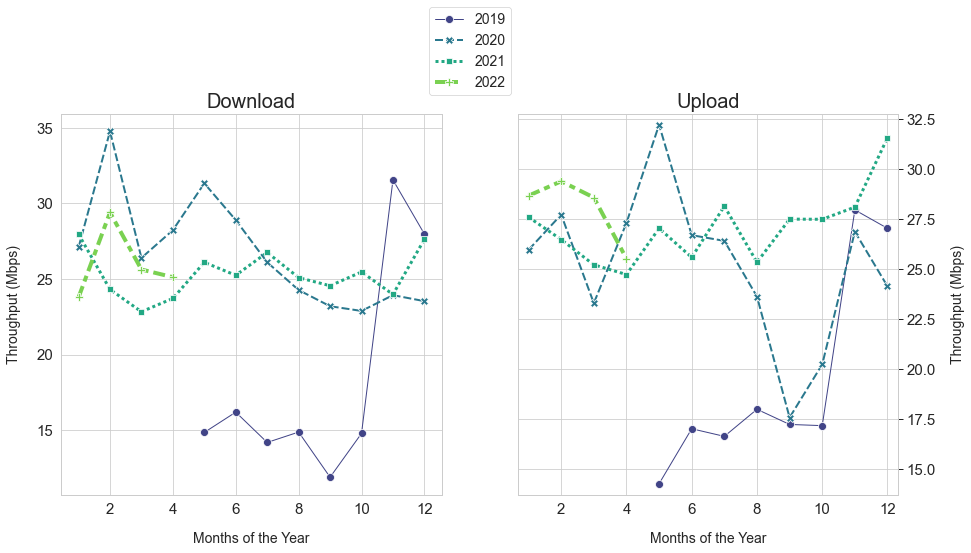

In [68]:
#Doha plot
fig, ax = plt.subplots(1,2)

sb.lineplot(x='month',y='Throughput_Doha',data=dfDoha, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[0]) # for download

sb.lineplot(x='month',y='Throughput_Doha',data=dfDoha_upload, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[1]) # for upload

ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_title('Download', fontdict={'fontsize': 20})

ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_title('Upload', fontdict={'fontsize': 20})
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

plt.margins(0.03)
ax[0].legend(labels=['2019','2020', '2021', '2022'], prop={'size': 14}, bbox_to_anchor=(1.2, 1.3))
plt.savefig('figures/dohathru.pdf', bbox_inches='tight')

## Muscat - Download

In [69]:
#Muscat - Import Data
df = pd.read_csv(r'muscat\muscat_download_may22.csv', parse_dates=['date'], index_col='date')
dfMuscat = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Muscat"})
dfMuscat['month'] = pd.to_datetime(dfMuscat.index).month
dfMuscat['year'] = pd.to_datetime(dfMuscat.index).year
dfMuscat

,Throughput_Muscat,month,year
date,,,
2019-05-31,6.046910,5,2019
2019-06-30,7.133383,6,2019
2019-07-31,5.100332,7,2019
2019-08-31,6.019265,8,2019
2019-09-30,6.621583,9,2019
2019-10-31,6.387797,10,2019
2019-11-30,11.536339,11,2019
2019-12-31,17.306887,12,2019
2020-01-31,17.239458,1,2020


## Muscat - Upload

In [70]:
df = pd.read_csv(r'muscat\muscat_upload_may22.csv', parse_dates=['date'], index_col='date')
dfMuscat_upload = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Muscat"})
dfMuscat_upload['month'] = pd.to_datetime(dfMuscat_upload.index).month
dfMuscat_upload['year'] = pd.to_datetime(dfMuscat_upload.index).year
dfMuscat_upload

,Throughput_Muscat,month,year
date,,,
2019-05-31,5.140554,5,2019
2019-06-30,4.216340,6,2019
2019-07-31,3.856932,7,2019
2019-08-31,4.363457,8,2019
2019-09-30,4.965727,9,2019
2019-10-31,5.890543,10,2019
2019-11-30,5.801583,11,2019
2019-12-31,6.643187,12,2019
2020-01-31,7.516551,1,2020


## Muscat Plot

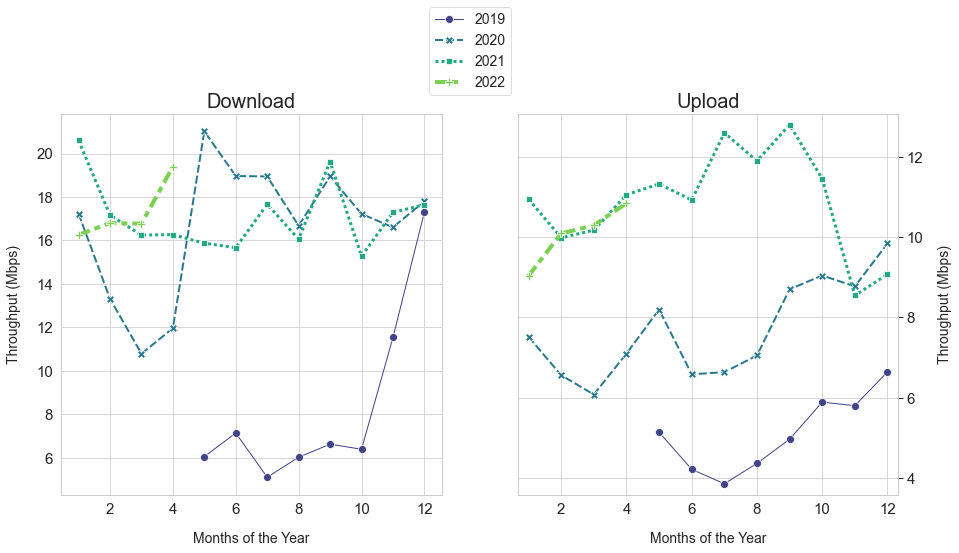

In [71]:
#Muscat plot
fig, ax = plt.subplots(1,2)
sb.lineplot(x='month',y='Throughput_Muscat',data=dfMuscat, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[0]) # for download

sb.lineplot(x='month',y='Throughput_Muscat',data=dfMuscat_upload, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[1]) # for upload

ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_title('Download', fontdict={'fontsize': 20})

ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_title('Upload', fontdict={'fontsize': 20})
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

plt.margins(0.03)
ax[0].legend(labels=['2019','2020', '2021', '2022'], prop={'size': 14}, bbox_to_anchor=(1.2, 1.3))
plt.savefig('figures/muscatthru.pdf', bbox_inches='tight')

## Manama - Download

In [72]:
#Manama - Import Data
df = pd.read_csv(r'manama\manama_download_may22.csv', parse_dates=['date'], index_col='date')
dfManama = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Manama"})
dfManama['month'] = pd.to_datetime(dfManama.index).month
dfManama['year'] = pd.to_datetime(dfManama.index).year
dfManama

,Throughput_Manama,month,year
date,,,
2019-05-31,5.752473,5,2019
2019-06-30,7.925939,6,2019
2019-07-31,5.372652,7,2019
2019-08-31,6.519010,8,2019
2019-09-30,7.527802,9,2019
2019-10-31,7.328355,10,2019
2019-11-30,9.326349,11,2019
2019-12-31,9.517627,12,2019
2020-01-31,10.558622,1,2020


## Manama - Upload

In [73]:
df = pd.read_csv(r'manama\manama_upload_may22.csv', parse_dates=['date'], index_col='date')
dfManama_upload = df.resample('M').agg({'MeanThroughputMbps':'mean'}).rename(columns={"MeanThroughputMbps":"Throughput_Manama"})
dfManama_upload['month'] = pd.to_datetime(dfManama_upload.index).month
dfManama_upload['year'] = pd.to_datetime(dfManama_upload.index).year
dfManama_upload

,Throughput_Manama,month,year
date,,,
2019-05-31,2.961030,5,2019
2019-06-30,3.147807,6,2019
2019-07-31,2.805128,7,2019
2019-08-31,2.267996,8,2019
2019-09-30,3.052284,9,2019
2019-10-31,2.957434,10,2019
2019-11-30,4.303510,11,2019
2019-12-31,5.258025,12,2019
2020-01-31,4.497216,1,2020


## Manama Plot

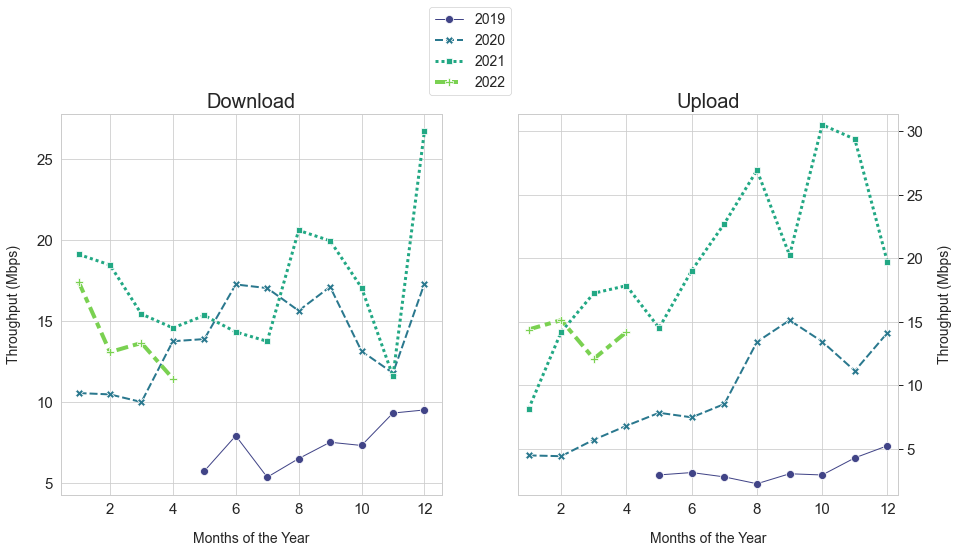

In [74]:
#Manama plot
fig, ax = plt.subplots(1,2)
sb.lineplot(x='month',y='Throughput_Manama',data=dfManama, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[0]) # for download

sb.lineplot(x='month',y='Throughput_Manama',data=dfManama_upload, hue = 'year', 
            style='year', markers=True, palette=palette, size='year', 
            legend=False, ax = ax[1]) # for upload

ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[0].set_title('Download', fontdict={'fontsize': 20})

ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].set_xlabel('Months of the Year', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 14}, labelpad = 15)
ax[1].set_title('Upload', fontdict={'fontsize': 20})
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

plt.margins(0.03)
ax[0].legend(labels=['2019','2020', '2021', '2022'], prop={'size': 14}, bbox_to_anchor=(1.2, 1.3))
plt.savefig('figures/manamathru.pdf', bbox_inches='tight')

## Plot All Downloads

In [75]:
#create a dict of dataframes based on year
Riyadh = dict(tuple(dfRiyadh.groupby('year')))
Dubai = dict(tuple(dfDubai.groupby('year')))
Kuwait = dict(tuple(dfKuwait.groupby('year')))
Doha = dict(tuple(dfDoha.groupby('year')))
Muscat = dict(tuple(dfMuscat.groupby('year')))
Manama = dict(tuple(dfManama.groupby('year')))


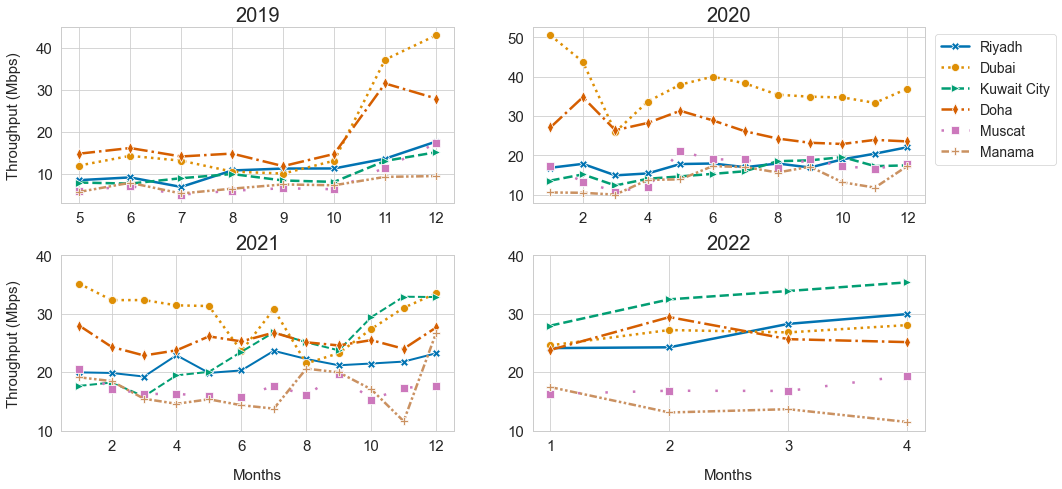

In [76]:
#sb.set(style="whitegrid")
fig, ax = plt.subplots(2,2)

#2019

sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh[2019], markers=True, 
            linestyle = "solid", linewidth = 2.5, marker = 'X', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai[2019], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait[2019], markers=True, 
            linestyle = "dashed", linewidth = 2.5, marker = '>', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha[2019], markers=True, 
            linestyle = "dashdot", linewidth = 2.5,marker = 'd', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat[2019], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama[2019], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[0,0])

#2020
sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh[2020], markers=True, 
            linestyle = "solid", linewidth = 2.5, marker = 'X', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai[2020], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait[2020], markers=True, 
            linestyle = "dashed", linewidth = 2.5, marker = '>', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha[2020], markers=True, 
            linestyle = "dashdot", linewidth = 2.5, marker = 'd', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat[2020], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama[2020], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[0,1])

#2021
sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh[2021], markers=True, 
            linestyle = "solid", marker = 'X', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai[2021], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait[2021], markers=True, 
            linestyle = "dashed", marker = '>', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha[2021], markers=True, 
            linestyle = "dashdot", linewidth = 2.5, marker = 'd', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat[2021], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama[2021], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[1,0])

#2022
sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh[2022], markers=True, 
            linestyle = "solid", linewidth = 2.5, marker = 'X', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai[2022], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait[2022], markers=True, 
            linestyle = "dashed", linewidth = 2.5, marker = '>', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha[2022], markers=True, 
            linestyle = "dashdot", linewidth = 2.5, marker = 'd', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat[2022], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama[2022], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[1,1])

ax[0,0].xaxis.label.set_visible(False)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0,0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 15}, labelpad = 15)
ax[0,0].set_title('2019', fontdict={'fontsize': 20})

ax[0,1].xaxis.label.set_visible(False)
ax[0,1].yaxis.label.set_visible(False)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0,1].set_title('2020', fontdict={'fontsize': 20})

ax[1,0].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1,0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 15}, labelpad = 15)
ax[1,0].set_yticks([10,20,30,40])
ax[1,0].set_title('2021', fontdict={'fontsize': 20})

ax[1,1].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
ax[1,1].set_xticks([1,2,3,4])
ax[1,1].yaxis.label.set_visible(False)
ax[1,1].set_yticks([10,20,30,40])
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1,1].set_title('2022', fontdict={'fontsize': 20})

#plt.margins(0.03)
ax[0,0].legend(labels=['Riyadh','Dubai', 'Kuwait City', 'Doha', 'Muscat', 'Manama'], prop={'size': 14}, bbox_to_anchor=(2.55, 1))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
plt.savefig('figures/all_download_thru.pdf', bbox_inches='tight')

## Plot All Upload

In [23]:
#create a dict of dataframes based on year
Riyadh_U = dict(tuple(dfRiyadh_upload.groupby('year')))
Dubai_U = dict(tuple(dfDubai_upload.groupby('year')))
Kuwait_U = dict(tuple(dfKuwait_upload.groupby('year')))
Doha_U = dict(tuple(dfDoha_upload.groupby('year')))
Muscat_U = dict(tuple(dfMuscat_upload.groupby('year')))
Manama_U = dict(tuple(dfManama_upload.groupby('year')))

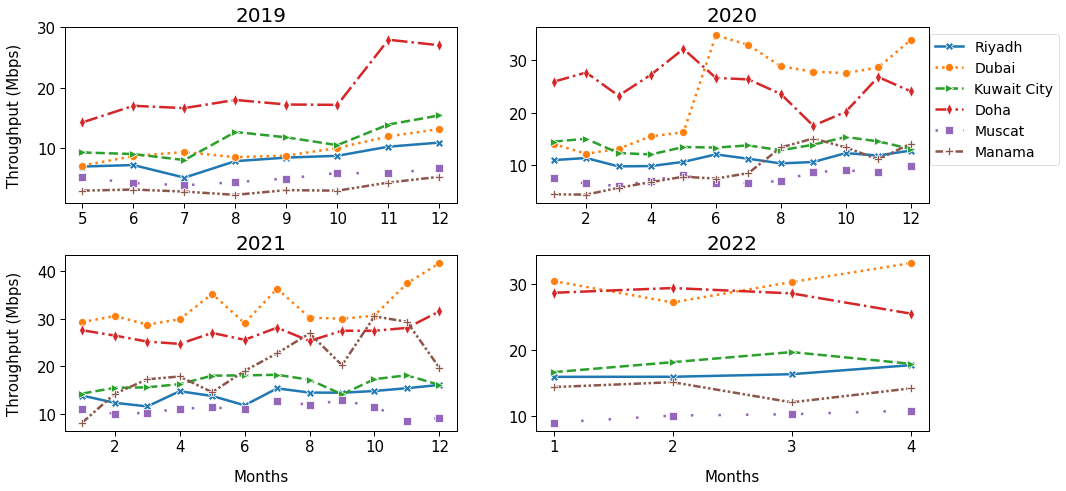

In [24]:
#sb.set(style="whitegrid")
fig, ax = plt.subplots(2,2)

#2019

sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh_U[2019], markers=True, 
            linestyle = "solid", linewidth = 2.5, marker = 'X', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai_U[2019], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait_U[2019], markers=True, 
            linestyle = "dashed", linewidth = 2.5, marker = '>', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha_U[2019], markers=True, 
            linestyle = "dashdot", linewidth = 2.5,marker = 'd', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat_U[2019], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[0,0])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama_U[2019], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[0,0])

#2020
sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh_U[2020], markers=True, 
            linestyle = "solid", linewidth = 2.5, marker = 'X', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai_U[2020], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait_U[2020], markers=True, 
            linestyle = "dashed", linewidth = 2.5, marker = '>', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha_U[2020], markers=True, 
            linestyle = "dashdot", linewidth = 2.5, marker = 'd', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat_U[2020], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[0,1])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama_U[2020], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[0,1])

#2021
sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh_U[2021], markers=True, 
            linestyle = "solid", linewidth = 2.5, marker = 'X', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai_U[2021], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait_U[2021], markers=True, 
            linestyle = "dashed", linewidth = 2.5, marker = '>', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha_U[2021], markers=True, 
            linestyle = "dashdot", linewidth = 2.5,marker = 'd', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat_U[2021], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[1,0])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama_U[2021], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[1,0])

#2022
sb.lineplot(x='month', y='Throughput_Riyadh',data=Riyadh_U[2022], markers=True, 
            linestyle = "solid", linewidth = 2.5, marker = 'X', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Dubai',data=Dubai_U[2022], markers=True, 
            linestyle = "dotted", linewidth = 2.5, marker = 'o', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Kuwait',data=Kuwait_U[2022], markers=True, 
            linestyle = "dashed", linewidth = 2.5, marker = '>', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Doha',data=Doha_U[2022], markers=True, 
            linestyle = "dashdot", linewidth = 2.5,marker = 'd', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Muscat',data=Muscat_U[2022], markers=True, 
            linestyle = (0, (1, 10)), linewidth = 2.5, marker = 's', legend=False, ax = ax[1,1])

sb.lineplot(x='month', y='Throughput_Manama',data=Manama_U[2022], markers=True, 
            linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 2.5, marker = 'P', legend=False, ax = ax[1,1])

ax[0,0].xaxis.label.set_visible(False)
ax[0,0].set_yticks([10,20,30])
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0,0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 15}, labelpad = 15)
ax[0,0].set_title('2019', fontdict={'fontsize': 20})

ax[0,1].xaxis.label.set_visible(False)
ax[0,1].yaxis.label.set_visible(False)
ax[0,1].set_yticks([10,20,30])
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0,1].set_title('2020', fontdict={'fontsize': 20})

ax[1,0].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1,0].set_ylabel('Throughput (Mbps)', fontdict={'fontsize': 15}, labelpad = 15)
ax[1,0].set_yticks([10,20,30,40])
ax[1,0].set_title('2021', fontdict={'fontsize': 20})

ax[1,1].set_xlabel('Months', fontdict={'fontsize': 15}, labelpad = 15)
ax[1,1].set_xticks([1,2,3,4])
ax[1,1].yaxis.label.set_visible(False)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1,1].set_title('2022', fontdict={'fontsize': 20})

#plt.margins(0.03)
ax[0,0].legend(labels=['Riyadh','Dubai', 'Kuwait City', 'Doha', 'Muscat', 'Manama'], prop={'size': 14}, bbox_to_anchor=(2.55, 1))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
plt.savefig('figures/all_upload_thru.pdf', bbox_inches='tight')